# scikit-learn入门

## 准备数据集

### 随机生成数据集 

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

In [13]:
X = np.random.randint(0, 100, (10, 4))
y = np.random.randint(0, 3, 10)
y.sort()

print('样本：')
print(X)
print('标签：', y)

样本：
[[25 36 30 90]
 [77 25 28  0]
 [ 1 33 79 43]
 [20 14 18  2]
 [38 72 57 93]
 [ 7 15 70 76]
 [20 39 21 67]
 [88 99 67 45]
 [74 82 76 78]
 [97 42 23  5]]
标签： [0 0 0 0 0 1 1 1 1 2]


### 分割训练集、测试集 

In [14]:
# 分割训练集、测试集
# random_state确保每次随机分割得到相同的结果，相当于随机种子
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=7) 

print('训练集：')
print(X_train)
print(y_train)

print('测试集：')
print(X_test)
print(y_test)

训练集：
[[77 25 28  0]
 [97 42 23  5]
 [88 99 67 45]
 [20 14 18  2]
 [20 39 21 67]
 [38 72 57 93]]
[0 2 1 0 1 0]
测试集：
[[74 82 76 78]
 [ 7 15 70 76]
 [25 36 30 90]
 [ 1 33 79 43]]
[1 1 0 0]


###  特征归一化 

In [15]:
# 特征归一化
from sklearn import preprocessing

x1 = np.random.randint(0, 1000, 5).reshape(5,1)
x2 = np.random.randint(0, 10, 5).reshape(5, 1)
x3 = np.random.randint(0, 100000, 5).reshape(5, 1)

X = np.concatenate([x1, x2, x3], axis=1)
print(X)

[[  239     5 38067]
 [  262     8 76422]
 [  997     4 85897]
 [  874     3 64300]
 [  485     0 82945]]


In [16]:
print(preprocessing.scale(X))  # 采用的是中心归一化

[[-1.06575123  0.38348249 -1.8087088 ]
 [-0.99200791  1.53392998  0.39646571]
 [ 1.36457197  0.          0.94121942]
 [ 0.97020554 -0.38348249 -0.30047407]
 [-0.27701837 -1.53392998  0.77149774]]


### 生成分类数据进行验证scale的必要性 

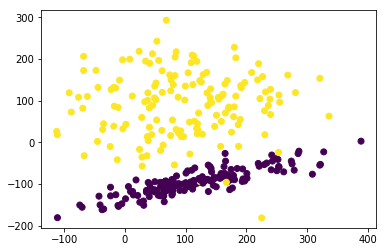

In [24]:
# 生成分类数据进行验证scale的必要性
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=25, n_clusters_per_class=1, scale=100)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [26]:
from sklearn import svm

# 注释掉以下这句表示不进行特征归一化     
X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=7) 
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
svm_classifier.score(X_test, y_test)

# 归一化前：0.52
# 归一化后：0.98

D:\software\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.98

## 训练模型

In [47]:
# 回归模型
from sklearn import datasets

boston_data = datasets.load_boston()
X = boston_data.data
y = boston_data.target

print('样本：')
print(X[:5, :])
print('标签：')
print(y[:5])

样本：
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
标签：
[24.  21.6 34.7 33.4 36.2]


In [48]:
# 选择线性回顾模型
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [49]:
from sklearn.model_selection import train_test_split

# 分割训练集、测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=7) 

In [50]:
# 训练模型
lr_model.fit(X_train, y_train)  # normalize归一化

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# 返回参数
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [52]:
lr_model.score(X_train, y_train)

0.7598132492351114

In [53]:
lr_model.score(X_test, y_test)

0.6693852753319394

## 交叉验证

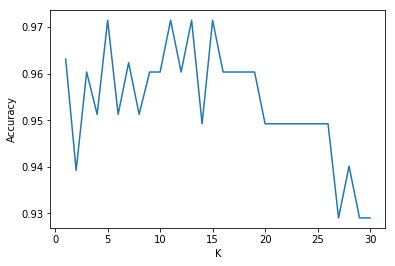

In [54]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier # KNN
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=10) 

k_range = range(1, 31)
cv_scores = []
for n in k_range:
    knn = KNeighborsClassifier(n)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') # 分类问题使用
    #scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error') # 回归问题使用
    cv_scores.append(scores.mean())
    
plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy') # Accuracy为准确率
plt.show()

In [56]:
# 选择最优的K
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train, y_train)
print(best_knn.score(X_test, y_test))
print(best_knn.predict(X_test))

0.96
[1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 2 2 2]
